# **1.Carga de Importaciones y Dataset**

In [1]:
#---- Importaciones necesarias ----

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


#---- Metricas de modelos de clasificación ----

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics


#----  Curva ROC y PR ----

from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score

#---- Importación para el modelo KNeighborsClassifier ----

from sklearn.neighbors import KNeighborsClassifier

#---- Para encontrar los mejores parametros ----

from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    name = fn

df = pd.read_csv(name, sep=";")

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


/tmp/ipython-input-2-3158976174.py:7: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";")


# **2.Preparcion de datos**

## Respaldo del dataframe

In [3]:
# Crear una variable como respaldo para poder arreglar el data set para poder utilizar despues para modelar
df_backup = df.copy()

## Limpieza de datos

In [4]:
df_backup.drop(columns=['Unnamed: 0'], inplace=True)
# esta colmuna se elimnara ya que solamente contiene datos false lo que indica que ningun jugador ha presentado fallas en las partidas
df_backup.drop(columns=['AbnormalMatch'], inplace=True)
#esta colmuna FirstKillTime la eliminaremos ya que nos sirve para la hipotesis o preguntas
df_backup.drop(columns=['FirstKillTime'], inplace=True)
#Eliminad tiemplive y TravelledDistance podria no ser relevante para el analisis o hipotesis
df_backup.drop(columns=['TimeAlive'], inplace=True)
df_backup.drop(columns=['TravelledDistance'], inplace=True)

In [5]:
# Como hay pocos nulos, eliminamos esas filas
df_backup.dropna(inplace=True)
# Verificar cantidad de nulos
print(df_backup.isnull().sum())

Map                            0
Team                           0
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    0
Survived                       0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int64


### Eliminación de datos atipicos

In [6]:
# Eliminando datos atipicos mayores a 28 de la culumna Asesinatos en la partida
df_backup.drop(df_backup[df_backup['MatchKills'] > 28].index, inplace=True)
df_backup.shape

(78992, 25)

In [7]:
# Eliminando datos atipicos mayores a 8 de la culumna asistencias en la partida
df_backup.drop(df_backup[df_backup['MatchAssists'] > 8].index, inplace=True)
df_backup.shape

(78707, 25)

# **Trasformacion de datos**



* **Ver Valores Únicos en la Columna ""Team" y "Mapa"**

In [8]:
df_backup.Team.unique()

array(['Terrorist', 'CounterTerrorist'], dtype=object)

## Uso de la técnica - label encoding


In [9]:
label_encoder = LabelEncoder()
df_backup['Team'] = label_encoder.fit_transform(df_backup['Team'])
df_backup['Map'] = label_encoder.fit_transform(df_backup['Map'])
display(df_backup.head())
display(df_backup.info())

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,RLethalGrenadesThrown,RNonLethalGrenadesThrown,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,1,1,1,4,1,False,True,False,0,4,...,0,0,0,0,750,4400,0,0,0,0
1,1,1,1,4,1,False,True,False,0,0,...,0,0,0,0,800,4400,0,0,0,0
2,1,1,1,4,1,False,True,False,0,0,...,0,0,0,0,1000,4400,0,0,0,0
3,1,1,1,4,1,False,True,False,0,0,...,0,0,0,0,850,4400,0,0,0,0
4,1,1,1,4,1,False,True,True,1,1,...,0,0,0,0,1000,4400,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 78707 entries, 0 to 79156
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Map                          78707 non-null  int64  
 1   Team                         78707 non-null  int64  
 2   InternalTeamId               78707 non-null  int64  
 3   MatchId                      78707 non-null  int64  
 4   RoundId                      78707 non-null  int64  
 5   RoundWinner                  78707 non-null  object 
 6   MatchWinner                  78707 non-null  object 
 7   Survived                     78707 non-null  bool   
 8   RLethalGrenadesThrown        78707 non-null  int64  
 9   RNonLethalGrenadesThrown     78707 non-null  int64  
 10  PrimaryAssaultRifle          78707 non-null  float64
 11  PrimarySniperRifle           78707 non-null  float64
 12  PrimaryHeavy                 78707 non-null  float64
 13  PrimarySMG           

None

In [10]:
df_backup['Map'].unique()

array([1, 3, 2, 0])

## Transformación de los datos Booleanos

In [11]:
df_backup['RoundWinner'] = df_backup['RoundWinner'].astype(str).replace({'True': 1, 'False': 0}).astype(int)
df_backup['MatchWinner'] = df_backup['MatchWinner'].astype(str).replace({'True': 1, 'False': 0}).astype(int)
df_backup['Survived'] = df_backup['Survived'].replace({True: 1, False: 0})
display(df_backup.info())

<class 'pandas.core.frame.DataFrame'>
Index: 78707 entries, 0 to 79156
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Map                          78707 non-null  int64  
 1   Team                         78707 non-null  int64  
 2   InternalTeamId               78707 non-null  int64  
 3   MatchId                      78707 non-null  int64  
 4   RoundId                      78707 non-null  int64  
 5   RoundWinner                  78707 non-null  int64  
 6   MatchWinner                  78707 non-null  int64  
 7   Survived                     78707 non-null  int64  
 8   RLethalGrenadesThrown        78707 non-null  int64  
 9   RNonLethalGrenadesThrown     78707 non-null  int64  
 10  PrimaryAssaultRifle          78707 non-null  float64
 11  PrimarySniperRifle           78707 non-null  float64
 12  PrimaryHeavy                 78707 non-null  float64
 13  PrimarySMG           

/tmp/ipython-input-11-2644962479.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_backup['RoundWinner'] = df_backup['RoundWinner'].astype(str).replace({'True': 1, 'False': 0}).astype(int)
/tmp/ipython-input-11-2644962479.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_backup['MatchWinner'] = df_backup['MatchWinner'].astype(str).replace({'True': 1, 'False': 0}).astype(int)
/tmp/ipython-input-11-2644962479.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To re

None

In [12]:
# Revisar estructura y tipos
df_backup.info()
# Vista previa de los primeros datos limpios
df_backup.head()

<class 'pandas.core.frame.DataFrame'>
Index: 78707 entries, 0 to 79156
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Map                          78707 non-null  int64  
 1   Team                         78707 non-null  int64  
 2   InternalTeamId               78707 non-null  int64  
 3   MatchId                      78707 non-null  int64  
 4   RoundId                      78707 non-null  int64  
 5   RoundWinner                  78707 non-null  int64  
 6   MatchWinner                  78707 non-null  int64  
 7   Survived                     78707 non-null  int64  
 8   RLethalGrenadesThrown        78707 non-null  int64  
 9   RNonLethalGrenadesThrown     78707 non-null  int64  
 10  PrimaryAssaultRifle          78707 non-null  float64
 11  PrimarySniperRifle           78707 non-null  float64
 12  PrimaryHeavy                 78707 non-null  float64
 13  PrimarySMG           

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,RLethalGrenadesThrown,RNonLethalGrenadesThrown,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,1,1,1,4,1,0,1,0,0,4,...,0,0,0,0,750,4400,0,0,0,0
1,1,1,1,4,1,0,1,0,0,0,...,0,0,0,0,800,4400,0,0,0,0
2,1,1,1,4,1,0,1,0,0,0,...,0,0,0,0,1000,4400,0,0,0,0
3,1,1,1,4,1,0,1,0,0,0,...,0,0,0,0,850,4400,0,0,0,0
4,1,1,1,4,1,0,1,1,1,1,...,0,0,0,0,1000,4400,0,0,0,0



- limitar las rondas que sean mayores 30 rondas

In [13]:
#  ajustar rondas que sean mayor a 30
df_backup = df_backup[(df_backup['RoundId'] >= 1) & (df_backup['RoundId'] <= 30)]

df_backup['RoundId'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

# **3.Modelo KNN**

scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

### Ingreso de las caracteristicas

In [21]:
X = df_backup[['Team', 'Map',  'RoundWinner']].values
y = df_backup['MatchWinner'].values

### Separación de los datos: entrenamiento y prueba

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20 ,random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Probando el Modelo KNN  y Evaluación

Intentos: 5 - 10 - 15 - 20 max (0.60)

In [23]:
n_neighbors = 20

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
    .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
    .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.60
Accuracy of K-NN classifier on test set: 0.60


In [24]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))

print(classification_report(y_test, pred))
#20 vecinos - 0.60

[[5390 2921]
 [3358 4053]]
              precision    recall  f1-score   support

           0       0.62      0.65      0.63      8311
           1       0.58      0.55      0.56      7411

    accuracy                           0.60     15722
   macro avg       0.60      0.60      0.60     15722
weighted avg       0.60      0.60      0.60     15722



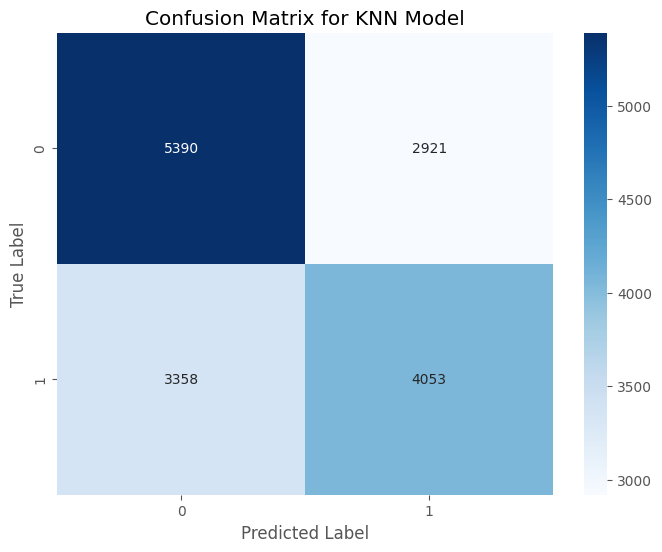

In [25]:

plt.figure(figsize=(8, 6))
sb.heatmap(confusion_matrix(y_test, pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for KNN Model")
plt.show()

### Calculando Sensitivity Y Specificity

In [26]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

# Calculate Sensitivity (Recall)
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity (Recall): 0.55
Specificity: 0.65


### Grafico - Nearest Neighbors Classification

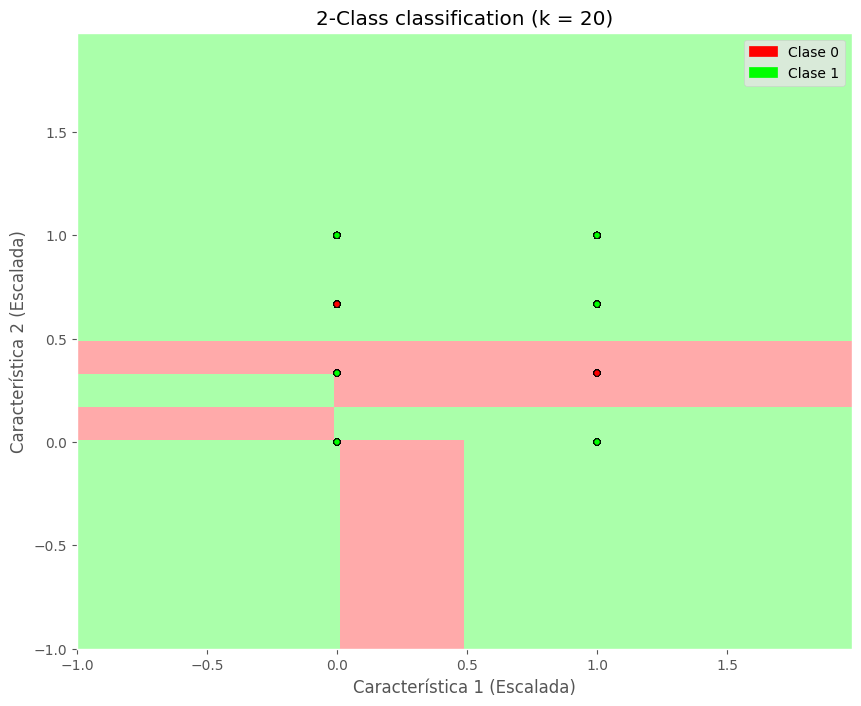

In [27]:
# prompt: creame un grafico de Nearest Neighbors Classification

# Crear un mapa de colores para la visualización
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# Visualizar los resultados de la clasificación KNN
h = .02  # tamaño de paso en la malla
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel(), np.full_like(xx.ravel(), X_test[:, 2].mean())]) # Usar el promedio de la tercera característica
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Trazar también los puntos de entrenamiento
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)" % n_neighbors)
plt.xlabel('Característica 1 (Escalada)')
plt.ylabel('Característica 2 (Escalada)')

# Crear leyendas personalizadas
patch_0 = mpatches.Patch(color='#FF0000', label='Clase 0')
patch_1 = mpatches.Patch(color='#00FF00', label='Clase 1')
plt.legend(handles=[patch_0, patch_1])

plt.show()

### Curva ROC

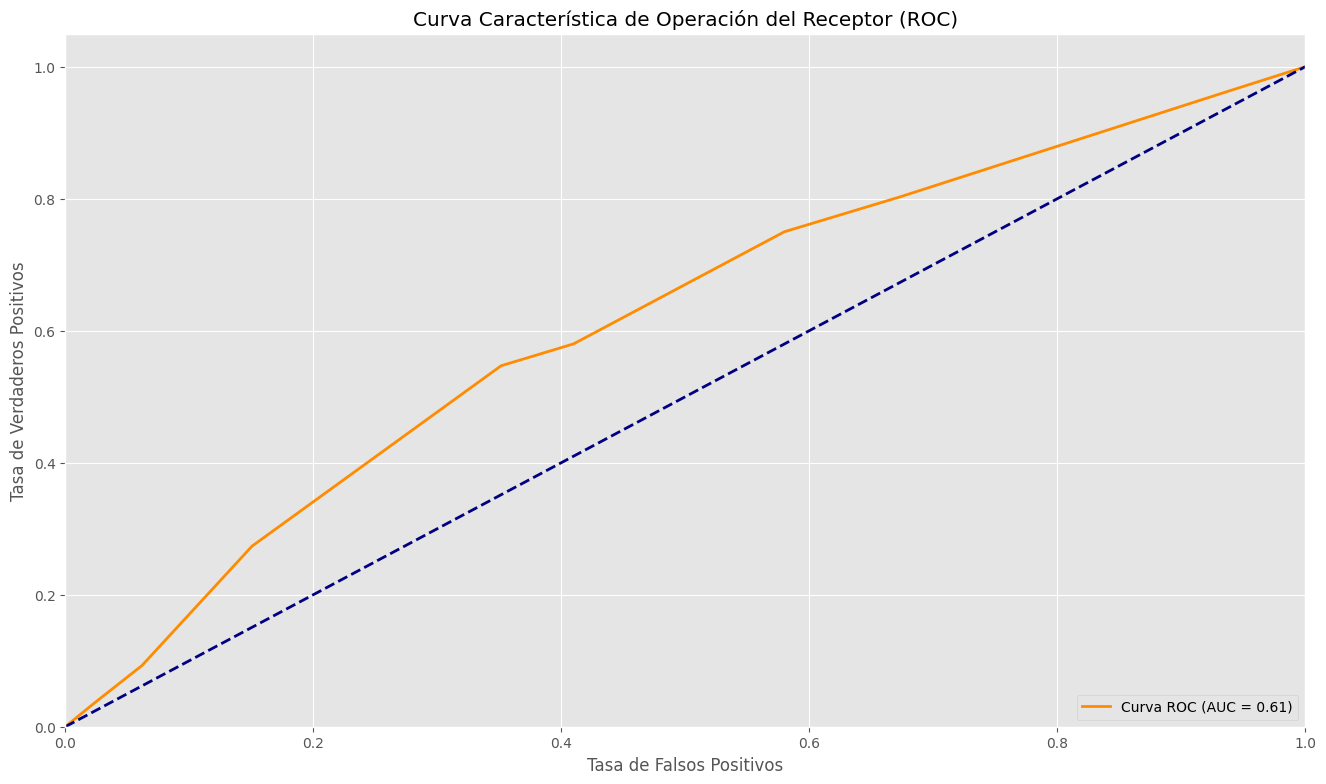

In [28]:

# Probabilidades de predicción
y_pred_proba = knn.predict_proba(X_test)[:,1]

# Calcular la curva ROC y el área bajo la curva
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva Característica de Operación del Receptor (ROC)')
plt.legend(loc="lower right")
plt.show()

###  Curva PR

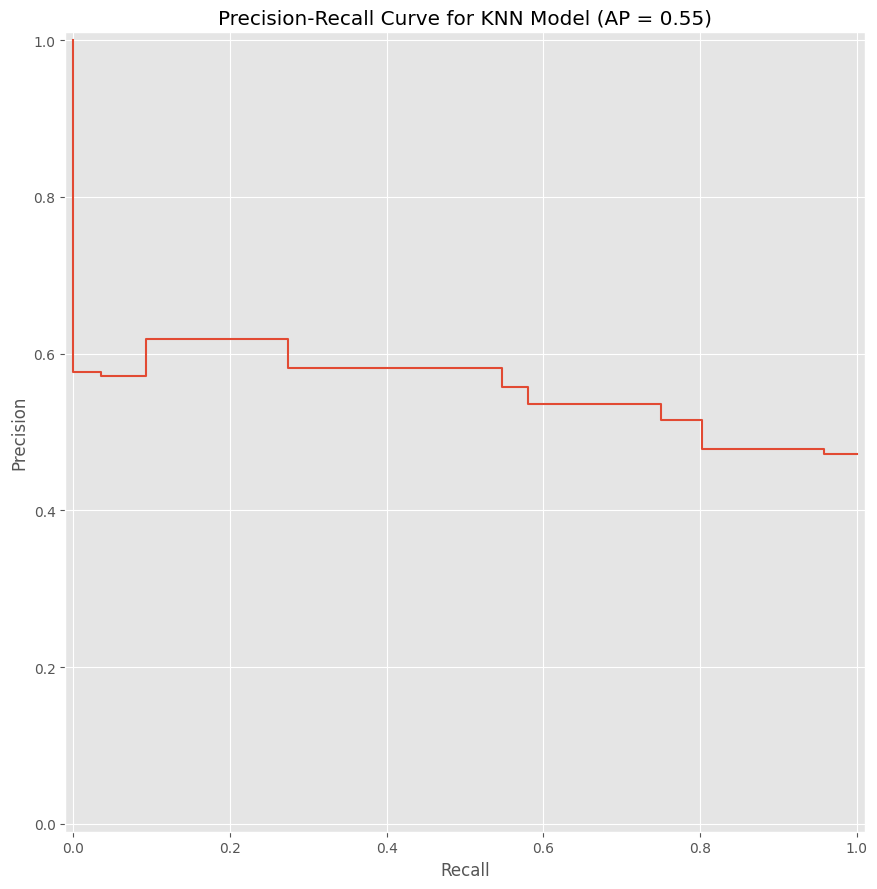

In [ ]:
# Obtener probabilidades del modelo KNN (clase positiva)
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Calcular precision, recall y thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calcular el área bajo la curva PR
ap_score = average_precision_score(y_test, y_pred_proba)

# Graficar
fig, ax = plt.subplots()
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
pr_display.plot(ax=ax)
ax.set_title(f'Precision-Recall Curve for KNN Model (AP = {ap_score:.2f})')
plt.grid(True)
plt.tight_layout()
plt.show()

### Valor de K
¿Que es exactamente?
- texto

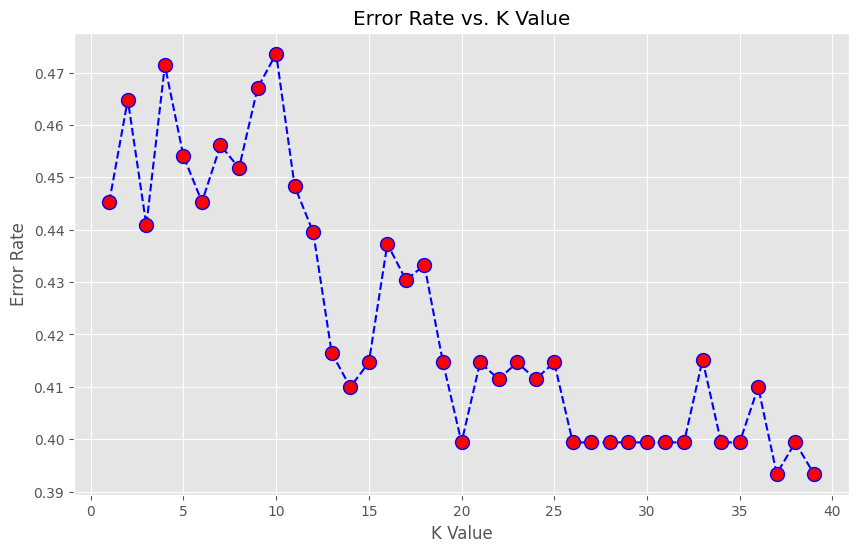

In [ ]:
error_rate = []

# Will take some time
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()


# **GridsearchCV**

In [ ]:
# prompt: dame la plantilla de gridsearchcv para el modelo KNN

import numpy as np
# Definir los parámetros a ajustar
param_grid = {'n_neighbors': np.arange(1, 40)}

# Inicializar el modelo KNN
knn = KNeighborsClassifier()

# Inicializar GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy') # cv=5 para 5-fold cross-validation

# Entrenar GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y la mejor puntuación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación de cross-validation:", grid_search.best_score_)

# Obtener el mejor modelo entrenado
best_knn = grid_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
test_accuracy = best_knn.score(X_test, y_test)
print("Accuracy en el conjunto de prueba con los mejores parámetros:", test_accuracy)

# Predecir con el mejor modelo
y_pred_gs = best_knn.predict(X_test)

# Mostrar métricas de clasificación para el mejor modelo
print("\nClassification Report con los mejores parámetros:")
print(classification_report(y_test, y_pred_gs))

print("\nConfusion Matrix con los mejores parámetros:")
print(confusion_matrix(y_test, y_pred_gs))

Mejores parámetros: {'n_neighbors': np.int64(39)}
Mejor puntuación de cross-validation: 0.5969342218131255
Accuracy en el conjunto de prueba con los mejores parámetros: 0.6066022134588475

Classification Report con los mejores parámetros:
              precision    recall  f1-score   support

           0       0.65      0.55      0.60      8311
           1       0.57      0.67      0.62      7411

    accuracy                           0.61     15722
   macro avg       0.61      0.61      0.61     15722
weighted avg       0.61      0.61      0.61     15722


Confusion Matrix con los mejores parámetros:
[[4579 3732]
 [2453 4958]]


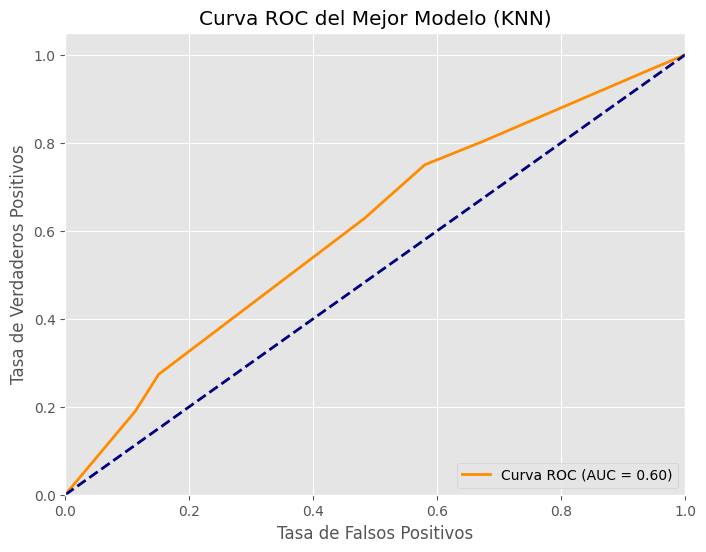

-


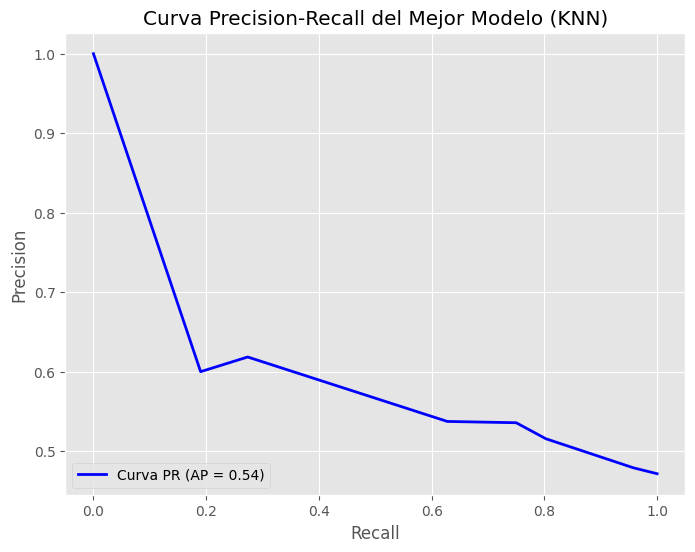

In [ ]:
# Obtener el mejor modelo desde GridSearchCV
best_model = grid_knn.best_estimator_

# Probabilidades para la clase positiva
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# === CURVA ROC ===
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del Mejor Modelo (KNN)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("-")
# === CURVA PRECISIÓN-RECALL ===
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Curva PR (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall del Mejor Modelo (KNN)')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()



# **Conclusión**

* El modelo KNN base mostró un rendimiento moderado, con un accuracy del 60% y un F1-score de 0.56 para la clase 1. Aunque logró una precisión aceptable (0.58), su recall fue bajo (0.55), lo que significa que falló al detectar una buena parte de los casos positivos. Además, su área bajo la curva PR (0.49) indicó que su capacidad de detección en escenarios con clases desbalanceadas no era la mejor. En resumen, el modelo base es funcional, pero limitado en su capacidad para identificar correctamente los casos positivos más relevantes.

* Y al aplicar GridSearchCV, el modelo mejoró significativamente su comportamiento. El recall de la clase 1 aumentó a 0.67,  y a la ves reduciendo los falsos negativos, y el F1-score subió a 0.62,viendo el  mejor balance entre precisión y sensibilidad. Además, la curva PR de AP subió a 0.54, lo que indica mayor efectividad en problemas con clases desbalanceadas. Aunque el accuracy aumento solo ligeramente (de 60% a 61%), la mejora en recall y F1-score lo convierte en una opción más confiable la detección de la clase 1